# Image Classification with HOG Feature and Neural Networks

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier

## 1. Dataset Preparation

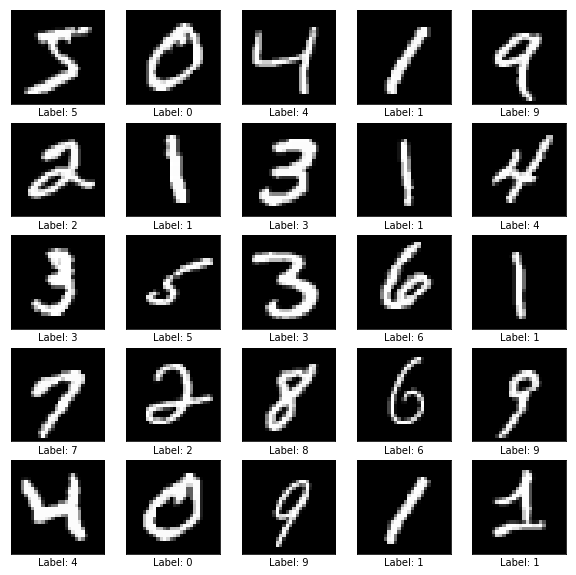

**Download MNIST dataset**

In [ ]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P ../images/mnist-dataset

In [ ]:
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P ../images/mnist-dataset

In [ ]:
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P ../images/mnist-dataset

In [ ]:
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P ../images/mnist-dataset

**Extract gzip file**

In [ ]:
!gzip -d ../images/mnist-dataset/train-images-idx3-ubyte.gz 

In [ ]:
!gzip -d ../images/mnist-dataset/train-labels-idx1-ubyte.gz

In [ ]:
!gzip -d ../images/mnist-dataset/t10k-images-idx3-ubyte.gz

In [ ]:
!gzip -d ../images/mnist-dataset/t10k-labels-idx1-ubyte.gz

In [2]:
!ls ../images/mnist-dataset/

t10k-images-idx3-ubyte	train-images-idx3-ubyte
t10k-labels-idx1-ubyte	train-labels-idx1-ubyte


**Load image dataset**

In [4]:
train_images, train_labels = loadlocal_mnist(images_path='../images/mnist-dataset/train-images-idx3-ubyte',
                                             labels_path='../images/mnist-dataset/train-labels-idx1-ubyte')

In [5]:
test_images, test_labels = loadlocal_mnist(images_path='../images/mnist-dataset/t10k-images-idx3-ubyte',
                                             labels_path='../images/mnist-dataset/t10k-labels-idx1-ubyte')

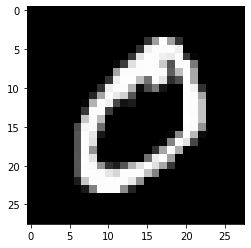

In [16]:
plt.imshow(train_images[1].reshape(28,28), cmap='gray')

In [17]:
train_labels[1]

0

**Test extract HOG feature from image**

In [20]:
feature, hog_img = hog(train_images[1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [22]:
feature.shape

(144,)

<BarContainer object of 144 artists>

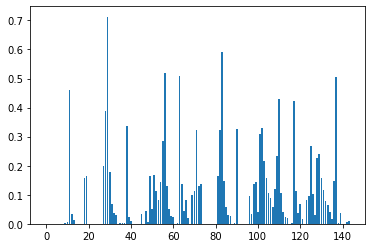

In [26]:
plt.bar(list(range(feature.shape[0])), feature)

In [27]:
feature, hog_img = hog(train_images[0].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

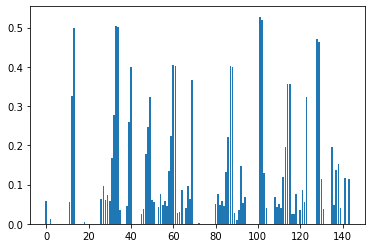

In [28]:
plt.bar(list(range(feature.shape[0])), feature)

## 2. Preprocessing using HOG Feature Extraction

In [29]:
n_dims = feature.shape[0]

In [30]:
n_dims

144

In [31]:
n_samples = train_images.shape[0]

In [32]:
n_samples

60000

**Create variable for dataset**

In [36]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [40]:
X_train.shape

(60000, 144)

**Get HOG feature from each image & put into dataset variable**

In [42]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

**Convert categorical label to one hot label**

In [43]:
from sklearn.preprocessing import LabelBinarizer

In [44]:
lb = LabelBinarizer()

In [45]:
lb.fit(y_train)

LabelBinarizer()

In [46]:
y_train_one_hot = lb.transform(y_train)

In [60]:
y_train_one_hot[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [61]:
y_train[0]

5

In [62]:
import numpy as np

In [63]:
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [64]:
label[0]

5

## 3. Classification with Neural Networks

In [66]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 10), solver='sgd', learning_rate_init=0.001, max_iter=100)

In [67]:
clf.fit(X_train, y_train_one_hot)

/home/ekorudiawan/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=(128, 64, 10), max_iter=100, solver='sgd')

## 4. Predict Test Dataset 

In [68]:
n_samples = test_images.shape[0]

In [69]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [70]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

In [72]:
y_test_one_hot = lb.transform(y_test)

In [76]:
y_pred_one_hot = clf.predict(X_test)

In [79]:
y_pred = lb.inverse_transform(y_pred_one_hot)

In [81]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

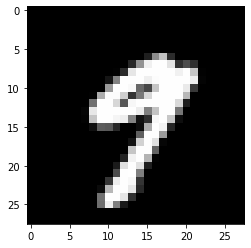

In [94]:
plt.imshow(test_images[20].reshape(28,28), cmap='gray')

In [95]:
out_one_hot = clf.predict(X_test[20].reshape(1, n_dims))

In [96]:
out_one_hot

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [97]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [98]:
out[0]

9

## 5. Evaluation Metrics

### 5. 1 Confussion Matrix

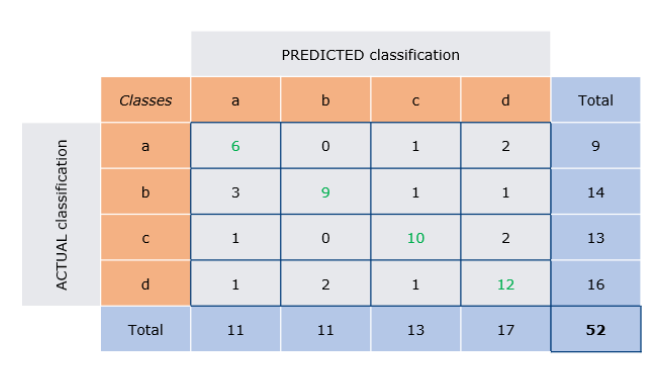

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
conf_mat = confusion_matrix(y_test, y_pred)

In [101]:
conf_mat

array([[ 973,    0,    0,    0,    1,    3,    0,    1,    1,    1],
       [  19, 1108,    3,    0,    3,    0,    2,    0,    0,    0],
       [  41,    1,  977,    4,    3,    0,    1,    4,    0,    1],
       [  37,    0,   11,  948,    0,    3,    0,    3,    1,    7],
       [  44,    3,    1,    1,  916,    0,    6,    4,    0,    7],
       [  30,    0,    1,   10,    0,  844,    3,    1,    2,    1],
       [  25,    0,    0,    0,    3,   10,  920,    0,    0,    0],
       [  47,    4,   20,    3,    7,    1,    0,  936,    0,   10],
       [  37,    2,    5,   14,    1,    7,    2,    0,  895,   11],
       [  41,    0,    0,    1,    8,    5,    0,   11,   13,  930]])

In [102]:
from mlxtend.plotting import plot_confusion_matrix

In [105]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

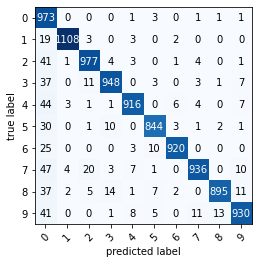

In [106]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

### 5.2 Precission

$$\text { Precision }=\frac{T P}{T P+F P}$$

In [107]:
from sklearn.metrics import precision_score

In [109]:
precision = precision_score(y_test, y_pred, average=None)

In [110]:
precision

array([0.75193199, 0.99105546, 0.95972495, 0.96636086, 0.97239915,
       0.96678121, 0.98501071, 0.975     , 0.98135965, 0.9607438 ])

### 5.3 Recall

$$\text { Recall }=\frac{T P}{T P+F N}$$

In [111]:
from sklearn.metrics import recall_score

In [112]:
recall = recall_score(y_test, y_pred, average=None)

In [113]:
recall

array([0.99285714, 0.97621145, 0.94670543, 0.93861386, 0.93279022,
       0.94618834, 0.96033403, 0.91050584, 0.91889117, 0.92170466])

### 5.4 Accuracy

$$\text { Accuracy }=\frac{T P+T N}{T P+T N+F P+F N}$$

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy = accuracy_score(y_test, y_pred)

In [116]:
accuracy

0.9447

### 5.5 F1-Score

$$\text { F1-Score }=\left(\frac{2}{\text { precision }^{-1}+\text { recall }^{-1}}\right)=2 \cdot\left(\frac{\text { precision } \cdot \text { recall }}{\text { precision }+\text { recall }}\right)$$

In [121]:
from sklearn.metrics import f1_score

In [122]:
f1 = f1_score(y_test, y_pred, average='macro')

In [123]:
f1

0.9457434932019642